### Saul Acevedo

# Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from PIL import Image
from numpy.linalg import matrix_power
from scipy.linalg import eig

## Question 1

Show that in a pure birth process $\sum_{n=0}^\infty P_n(t) = 1$ for all $t$, if only if $\sum_{n=0}^\infty \frac{1}{\lambda_n} = \infty$. Come up with an “explosive” process, that is a birth process which cannot be normalized for all finite times. Write a program to simulate this process. You will have to be careful in the implementation as realizations can (and typically will) “blow up” in finite time.

### Answer

If we use the rate parameter $\lambda_n = \lambda n^2$, $\sum_{n=0}^\infty \frac{1}{\lambda_n} < \infty$, then the process is explosive, which means that the population size reaches $\infty$ at some finite time. Thus, $\sum_{n=0}^\infty P_n(t) \neq{1}$. This can be seen through simulation:

In [18]:
current_time = 0
num_population = 1
MAX_TIME = 100
lamb = 0.3
times = []
pop_counts = []


while current_time < MAX_TIME:
  birth_rate = lamb * num_population**2
  r1 = np.random.uniform()
  dt = -np.log(r1)/birth_rate

  r2 = np.random.uniform(0, birth_rate)

  if r2 < birth_rate:
    num_population += 1

  current_time += dt
  times.append(current_time)
  pop_counts.append(num_population)

  if num_population > 20000:
    break

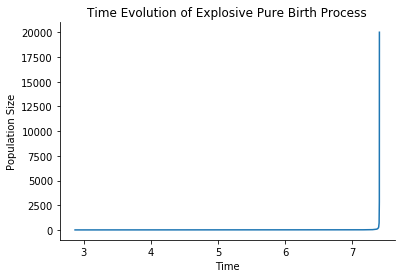

In [19]:
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Time Evolution of Explosive Pure Birth Process')
plt.plot(times, pop_counts)
sns.despine()

## Question 2

In the simple birth and death process $\lambda_n = \lambda n$ and $\mu_n = \mu n$ for some constants $\lambda$ and $\mu$. We can add immigration to this process, by assuming that during each interval of length $h$, there an individual will move into the population with probability $vh$. Here $v$ is constant independent of the population size. The deterministic model of the system has the form \begin{equation*} \frac{dn}{dt} = (\lambda - \mu ) n + v\end{equation*}

Show that the mean of the of the corresponding stochastic model, $\bar{n}$, equals the solution of this differential equation, with an appropriate initial condition. Give an example to show that this is not true for more general birth and death processes with immigration, and illustrate the example numerically.

### Answer

The master equation for the BDI process is: 

\begin{equation*} P'_n(t) = -(\lambda n + \mu n + v)P_n(t) + (\lambda(n-1) + v)P_{n-1}(t) + \mu(n+1)P_{n+1}(t)\end{equation*} 

We can obtain the mean of the stochastic process using the definition of the expected value:

\begin{equation*} m(t) = \sum_{n=1}^\infty n P_n(t) \end{equation*} 

Taking the derivative of the expected value function we obtain:

\begin{equation*} m'(t) = \sum_{n=1}^\infty n P'_n(t) \end{equation*} 

We can than substitute the master equation for $P'_n(t)$:

\begin{equation*} m'(t) = -\lambda \sum_{n=1}^\infty n^2 P_n(t) + -\mu \sum_{n=1}^\infty n^2 P_n(t) + -v \sum_{n=1}^\infty n P_n(t) + \lambda \sum_{n=1}^\infty (n-1)^2 P_{n-1}(t) + \lambda \sum_{n=1}^\infty (n-1) P_{n-1}(t)+ v \sum_{n=1}^\infty n P_{n-1}(t) + \mu \sum_{n=1}^\infty (n+1)^2 P_{n+1}(t) - \mu \sum_{n=1}^\infty (n+1)P_{n+1}(t)\end{equation*} 


Shifting the index of these series:

\begin{equation*} m'(t) = -\lambda \sum_{n=1}^\infty n^2 P_n(t) + -\mu \sum_{n=1}^\infty n^2 P_n(t) + -v \sum_{n=1}^\infty n P_n(t) + \lambda \sum_{n=1}^\infty n^2 P_n(t) + \lambda 0^2 P_0(t) + \lambda \sum_{n=1}^\infty n P_{n}(t) + \lambda 0 P_0(t) + v \sum_{n=1}^\infty n P_{n-1}(t) + \mu \sum_{n=1}^\infty n^2 P_n(t) + -\mu 1^2 P_1(t) - \mu \sum_{n=1}^\infty nP_n(t) + \mu 1^2 P_1(t) \end{equation*} 

Simplifying terms we obtain:

\begin{equation*} m'(t) = (\lambda - \mu)\sum_{n=1}^\infty n P_n(t) - v \sum_{n=1}^\infty n(P_n(t) - P_{n-1}(t))\end{equation*} 

Where term $\sum_{n=1}^\infty n(P_n(t) - P_{n-1}(t))$ converges to -1, giving us:

\begin{equation*} m'(t) = (\lambda - \mu)m(t) + v\end{equation*} 

We than can then solve this differential equation:

\begin{equation*} e^{-(\lambda - \mu)t}m'(t) - e^{-(\lambda - \mu)t}(\lambda - \mu)m(t) = ve^{-(\lambda - \mu)t} \end{equation*} 

\begin{equation*} D_t[e^{-(\lambda - \mu)t}m(t)] = ve^{-(\lambda - \mu)t} \end{equation*} 

\begin{equation*} \int D_t[e^{-(\lambda - \mu)t}m(t)]  dt = \int ve^{-(\lambda - \mu)t} dt \end{equation*} 

\begin{equation*} e^{-(\lambda - \mu)t}m(t)  = \frac{v}{-(\lambda - \mu)}e^{-(\lambda - \mu)t} + c \end{equation*} 

\begin{equation*} e^{(\lambda - \mu)t}(e^{-(\lambda - \mu)t}m(t))  = (\frac{v}{-(\lambda - \mu)}e^{-(\lambda - \mu)t} + c)e^{(\lambda - \mu)t} \end{equation*} 

\begin{equation*} m(t) = \frac{v}{(\mu - \lambda)} + ce^{(\lambda - \mu)t}  \end{equation*} 

Now if we solve the differential equation describing the BDI process, we obtain a similar solution:

\begin{equation*} n(t) = \frac{v}{(\mu - \lambda)} + ce^{(\lambda - \mu)t}  \end{equation*} 

Using appropriate initial conditions ($m(0)= n_0,n(0)= n_0$), we show that the stochastic mean population is equal to the value given by the solution to the differential equation:

\begin{equation*} m(t) = \frac{v}{(\mu - \lambda)} + (n_0 - \frac{v}{\mu - \lambda})e^{(\lambda - \mu)t}  \end{equation*}

\begin{equation*} n(t) = \frac{v}{(\mu - \lambda)} + (n_0 - \frac{v}{\mu - \lambda})e^{(\lambda - \mu)t}  \end{equation*}

Unlike the BDI process, the stochastic mean of the birth-death-immigration-emigration (BDIE) is not equivalent to the solution of the corresponding differential equation. This can be shown through simulation:

\begin{equation*} n'(t) = (\lambda - \mu)n(t) + v - w  \end{equation*} 

In [22]:
def run_simulation(lamb, mu, v, w, n, MAX_STEPS, index):
  time_points = []
  pop_sizes = [] 
  current_time = 0

  for i in range(MAX_STEPS):
    rates = np.array([lamb * n, mu * n, v, w])
    total_rate = np.sum(rates)
    current_time += -np.log(np.random.rand())/total_rate
    rates = np.cumsum(rates)
    draw_prob = np.random.rand() * total_rate

    if draw_prob < rates[0]:
      n += 1
    elif draw_prob < rates[1]:
      n -= 1
    elif draw_prob < rates[2]:
      n += 1
    else:
      n -= 1

    time_points.append(current_time)
    pop_sizes.append(n)

  return time_points, pop_sizes

In [23]:
lamb = 1
mu = 0.4
v = 1
w = 5
n = 20
max_steps = 3000
num_sims = 1000

sim_time_points = []
sim_pop_points = []

for i in range(num_sims):
  time, pop_size = run_simulation(lamb, mu, v, w, n, max_steps, i) 
  sim_time_points.append(time)
  sim_pop_points.append(pop_size)

In [36]:
def bdim_ode(n0, t):
    lamb = 1
    mu = 0.4
    v = 1
    w = 5
    n = n0
    dndt = (lamb - mu) * n + v - w
    return dndt

In [54]:
n0 = 20

time = np.linspace(0, 7.6)
result = odeint(bdim_ode, n0, time)
population_counts = result[:, 0]

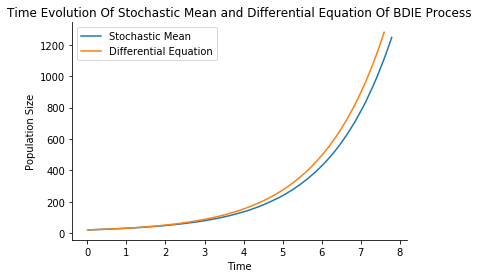

In [57]:
plt.plot(np.mean(sim_time_points, axis=0), np.mean(sim_pop_points, axis=0), label='Stochastic Mean')
plt.plot(time, population_counts, label='Differential Equation')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Time Evolution Of Stochastic Mean and Differential Equation Of BDIE Process')
plt.legend()
sns.despine()

## Question 3

The transition matrix for a four-state Markov chain is:

\begin{equation*} P =  \begin{pmatrix} 0 & 1/2 & 0 & 1/2\\ 1/4 & 0 & 3/4 & 0\\ 0 & 3/4 & 0 & 1/4\\ 1/2 & 0 & 1/2 & 0 \end{pmatrix} \end{equation*} 

### Answer

(a)	Draw the directed graph of the chain. 

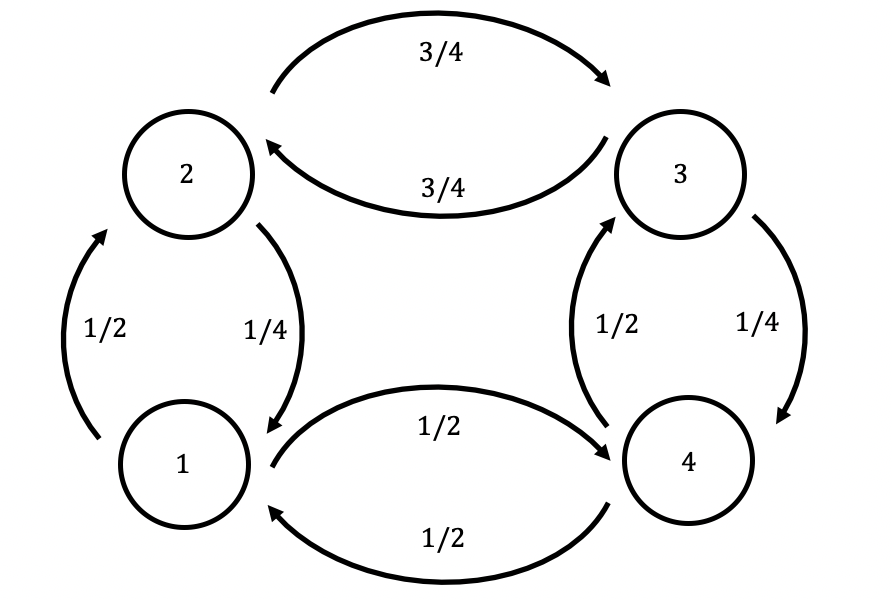

In [6]:
image = Image.open('img/markov_diagram.png')
image

(b) Show that the chain is irreducible, positive recurrent, and periodic. What is the period?

In [2]:
P = np.array([[0, 1/2, 0, 1/2],
    [1/4, 0, 3/4, 0],
    [0, 3/4, 0, 1/4],
    [1/2, 0, 1/2, 0]])

P_2 = matrix_power(P, 2)
P_3 = matrix_power(P, 3)

print("P\u00b2 = ")
print(P_2)
print("P\u00b3 = ")
print(P_3)

P² = 
[[0.375  0.     0.625  0.    ]
 [0.     0.6875 0.     0.3125]
 [0.3125 0.     0.6875 0.    ]
 [0.     0.625  0.     0.375 ]]
P³ = 
[[0.       0.65625  0.       0.34375 ]
 [0.328125 0.       0.671875 0.      ]
 [0.       0.671875 0.       0.328125]
 [0.34375  0.       0.65625  0.      ]]


Since $P^2_{ij} > 0$ or $P^3_{ij} > 0$, the chain is irreducible. Since the chain is irreducible and has a finite number of states, the chain is also positive recurrent. Since $P^2_{ii} > 0$, the chain is periodic. The period of this chain is 2, since you can return to any state in steps that are multiples of 2. 

(c) Find the unique stationary probability distribution.

In [12]:
eig(P, left=True, right=False)

(array([-1.  +0.j,  1.  +0.j, -0.25+0.j,  0.25+0.j]),
 array([[-0.31622777,  0.31622777, -0.5       ,  0.5       ],
        [ 0.63245553,  0.63245553, -0.5       , -0.5       ],
        [-0.63245553,  0.63245553,  0.5       , -0.5       ],
        [ 0.31622777,  0.31622777,  0.5       ,  0.5       ]]))

Get the eigenvector corresponding to the eigenvalue of 1, and normalize it:

In [15]:
eig(P, left=True, right=False)[1][:, 1] / np.sum(eig(P, left=True, right=False)[1][:, 1])

array([0.16666667, 0.33333333, 0.33333333, 0.16666667])

So, given the formula $\pi P = \pi$, where $\pi$ is the stationary distribution, we obtain $\pi = \begin{pmatrix}1/6, 1/3, 1/3, 1/6 \end{pmatrix}$

## Question 4

Assume that the arrival of proteins to a promoter can be described as a Poisson process with rate $\lambda$. If the promoter is not occupied, it will bind the protein. The time the proteins remain bound are independent random variables with mean $\mu$. A protein that arrives when the promoter is occupied diffuses away. Show that the long time fraction of time that the promoter is unoccupied is $\frac{1}{(1 + \lambda \mu)}$.

### Answer

Consider the following Markov Chain:

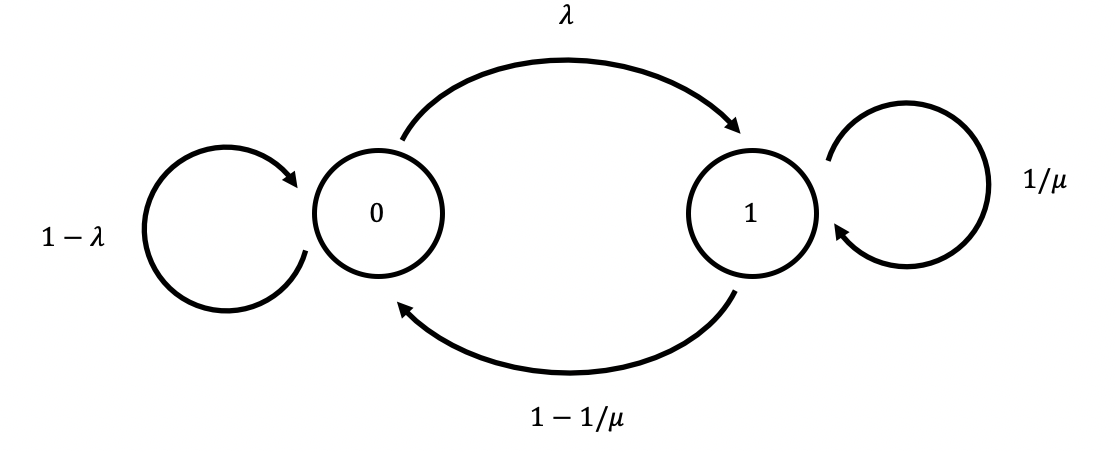

In [19]:
image = Image.open('img/binding_markov.png')
image

Where state 0 and state 1 correspond to an unoccupied and bound promoter, respectively. Therefore the following master equation describes the probability of being in state 0:

\begin{equation*} P'_0(t) = (1/\mu) P_1(t) - \lambda P_0(t)\end{equation*} 

Considering that $P_1(t) = 1 - P_0(t)$, we simplify:

\begin{equation*} P'_0(t) = (1/\mu) - (1/\mu + \lambda)P_0(t) \end{equation*} 

Then we solve the differential equation:

\begin{equation*} P'_0(t) + (1/\mu + \lambda)P_0(t) = (1/\mu)  \end{equation*} 

\begin{equation*} e^{(1/\mu + \lambda)t} P'_0(t) + (1/\mu + \lambda)e^{(1/\mu + \lambda)t}P_0(t) = (1/\mu)e^{(1/\mu + \lambda)t}\end{equation*} 

\begin{equation*} \int D_t[e^{(1/\mu + \lambda)t} P_0(t)] = \int (1/\mu)e^{(1/\mu + \lambda)t}\end{equation*} 

\begin{equation*} e^{(1/\mu + \lambda)t} P_0(t) = (1/\mu) \int e^{(1/\mu + \lambda)t}\end{equation*} 

\begin{equation*} \frac{1}{e^{(1/\mu + \lambda)t}} e^{(1/\mu + \lambda)t} P_0(t) = \frac{e^{(1/\mu + \lambda)t}}{\mu(1/\mu + \lambda)} \frac{1}{e^{(1/\mu + \lambda)t}}\end{equation*} 

\begin{equation*} P_0(t) = \frac{1}{1 + \lambda \mu} \end{equation*} 

This equation descibes the percentage of time the promoter remains unoccupied.

## Question 5

Assume that the sequence of action potentials (APs) fired by a neuron can be described as a Poisson process. For a fixed time $t$, let $T(t)$ be the time to the nearest AP in time. This could be an AP preceding or subsequent to the time $t$. What is the mean of $T(t)$? What is the probability density function of $T(t)$?

### Answer

Since $T(t)$ is the time to the nearest action potential, then the probability of an AP occuring during this interval is:

\begin{equation*} P(t) = P(T(t) \leq t) = 1 - e^{-\lambda t} \end{equation*}

Where $\lambda$ is the rate of the poisson process. To obtain the probability density function of $T(t)$ we can take the derivative of this cumulative distribution function:

\begin{equation*} \frac{d}{dt} P(t) = \lambda e^{-\lambda t} \end{equation*}

The mean of $T(t)$ is given by the expectation of the above PDF:

\begin{equation*} E[T(t)] = \int_0^\infty t \lambda e^{-\lambda t} \end{equation*}

\begin{equation*} = -te^{-\lambda t} + \int 1/\lambda e^{-\lambda t} \lambda \ dt \end{equation*}

\begin{equation*} = -te^{-\lambda t} + -\frac{1}{\lambda} e^{-\lambda t}\end{equation*}

\begin{equation*} =  \left[\frac{-\lambda t e^{-\lambda t} - e^{-\lambda t}}{\lambda} e^{-\lambda t}\right]_0^\infty \end{equation*}

\begin{equation*} =  \frac{1}{\lambda} \end{equation*}